In [2]:
# ─────────────────────────────────────────────
# 1 : Librairies
# ─────────────────────────────────────────────

# Classic
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import polars as pl

# Probabilities
from scipy.optimize import curve_fit
from tls.probabilities import proba_gamma

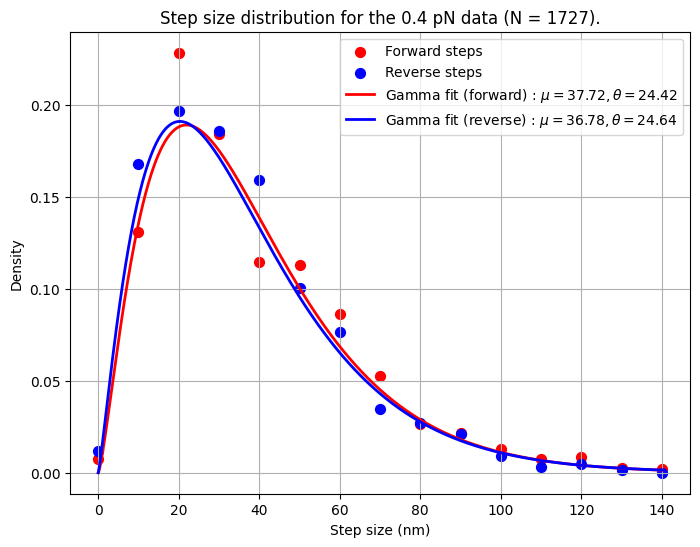

In [3]:
# ─────────────────────────────────────────────
# 2 : Datas + Fits + Conversions
# ─────────────────────────────────────────────

# Data
step_array = np.linspace(0, 140, 15)
frwd_array = np.array([8, 139, 243, 196, 122, 120, 92, 56, 28, 23, 14, 8, 9, 3, 2], dtype=float)
rvrs_array = np.array([8, 112, 131, 124, 106, 67, 51, 23, 18, 14, 6, 2, 3, 1, 0], dtype=float)
frwd_array /= np.sum(frwd_array)
rvrs_array /= np.sum(rvrs_array)

# Fitting
def gamma_fit(x, mu, theta):
    return proba_gamma(mu, theta, x)

popt_frwd, pcov_frwd = curve_fit(
    gamma_fit,
    step_array[1:],
    frwd_array[1:],
    p0=(20.0, 20.0),
    bounds=([1e-3, 1e-3], [np.inf, np.inf]),
)

popt_rvrs, pcov_rvrs = curve_fit(
    gamma_fit,
    step_array[1:],
    rvrs_array[1:],
    p0=(20.0, 20.0),
    bounds=([1e-3, 1e-3], [np.inf, np.inf]),
)

# 
x_fit = np.linspace(step_array.min(), step_array.max(), 1000)
y_fit_frwd = proba_gamma(popt_frwd[0], popt_frwd[1], x_fit) * 1000 / 15
y_fit_rvrs = proba_gamma(popt_rvrs[0], popt_rvrs[1], x_fit) * 1000 / 15


# Plot
plt.figure(figsize=(8,6))
plt.scatter(step_array, frwd_array, c="r", marker="o", s=50, label=rf"Forward steps")
plt.scatter(step_array, rvrs_array, c="b", marker="o", s=50, label=rf"Reverse steps")
plt.plot(x_fit, y_fit_frwd, "r-", lw=2, label=rf"Gamma fit (forward) : $\mu={popt_frwd[0]:.2f}, \theta={popt_frwd[1]:.2f}$")
plt.plot(x_fit, y_fit_rvrs, "b-", lw=2, label=rf"Gamma fit (reverse) : $\mu={popt_rvrs[0]:.2f}, \theta={popt_rvrs[1]:.2f}$")
plt.title("Step size distribution for the 0.4 pN data (N = 1727).")
plt.xlabel("Step size (nm)")
plt.ylabel("Density")
plt.grid(True)
plt.legend()
plt.show()

λ = 0.38519375361480623


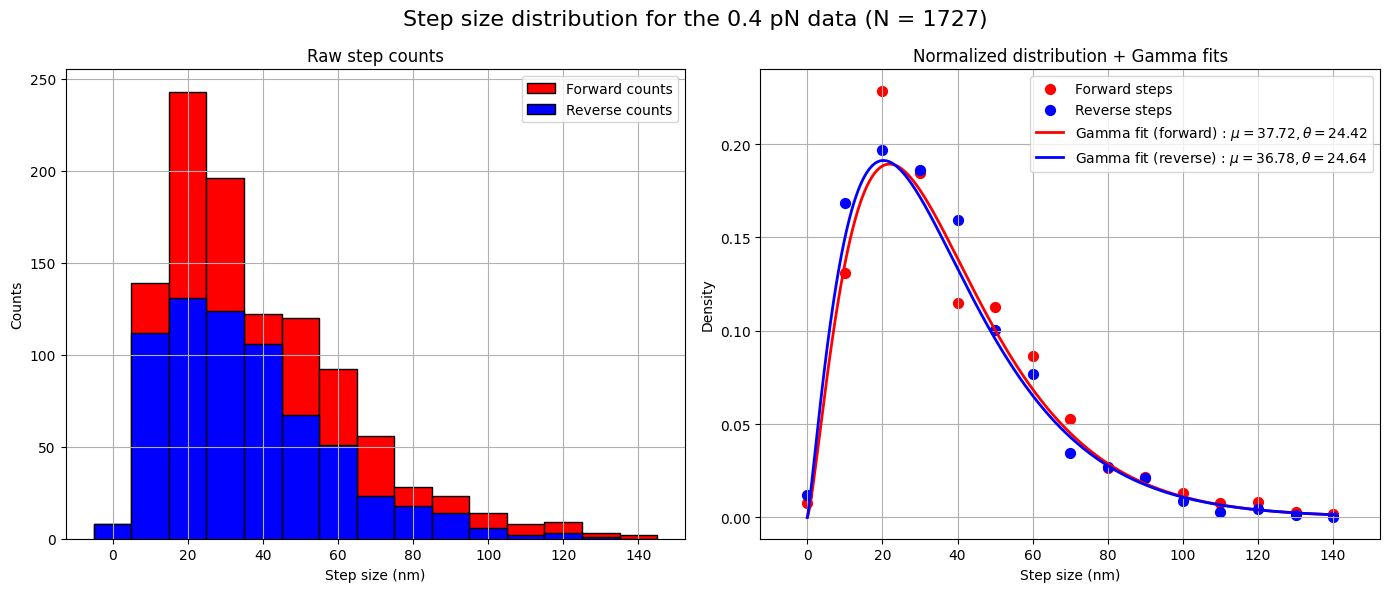

In [4]:
# ─────────────────────────────────────────────
# 2 : Datas + Fits + Conversions
# ─────────────────────────────────────────────

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Data
step_array = np.linspace(0, 140, 15)

frwd_counts = np.array([8, 139, 243, 196, 122, 120, 92, 56, 28, 23, 14, 8, 9, 3, 2], dtype=float)
rvrs_counts = np.array([8, 112, 131, 124, 106, 67, 51, 23, 18, 14, 6, 2, 3, 1, 0], dtype=float)
lmbda = np.sum(rvrs_counts) / (np.sum(frwd_counts) + np.sum(rvrs_counts))
print(f"λ = {lmbda}")

# Normalized densities
frwd_array = frwd_counts / np.sum(frwd_counts)
rvrs_array = rvrs_counts / np.sum(rvrs_counts)

# Gamma model
def gamma_fit(x, mu, theta):
    return proba_gamma(mu, theta, x)

# Fitting (exclude x = 0)
popt_frwd, pcov_frwd = curve_fit(
    gamma_fit,
    step_array[1:],
    frwd_array[1:],
    p0=(20.0, 20.0),
    bounds=([1e-3, 1e-3], [np.inf, np.inf]),
)

popt_rvrs, pcov_rvrs = curve_fit(
    gamma_fit,
    step_array[1:],
    rvrs_array[1:],
    p0=(20.0, 20.0),
    bounds=([1e-3, 1e-3], [np.inf, np.inf]),
)

# Smooth fit curves
x_fit = np.linspace(step_array.min(), step_array.max(), 1000)
y_fit_frwd = proba_gamma(popt_frwd[0], popt_frwd[1], x_fit) * 1000 / 15
y_fit_rvrs = proba_gamma(popt_rvrs[0], popt_rvrs[1], x_fit) * 1000 / 15

# ─────────────────────────────────────────────
# Plot
# ─────────────────────────────────────────────

fig, (ax_counts, ax_fit) = plt.subplots(
    1, 2, figsize=(14, 6), sharex=True
)

bin_width = step_array[1] - step_array[0]

ax_counts.bar(
    step_array,
    frwd_counts,
    width=bin_width,
    color="red",
    alpha=1.0,
    edgecolor="black",
    linewidth=1.0,
    label="Forward counts",
)

ax_counts.bar(
    step_array,
    rvrs_counts,
    width=bin_width,
    color="blue",
    alpha=1.0,
    edgecolor="black",
    linewidth=1.0,
    label="Reverse counts",
)


ax_counts.set_xlabel("Step size (nm)")
ax_counts.set_ylabel("Counts")
ax_counts.set_title("Raw step counts")
ax_counts.grid(True)
ax_counts.legend()

# Right subplot: normalized densities + Gamma fits
ax_fit.scatter(
    step_array, frwd_array,
    c="r", s=50, label="Forward steps"
)
ax_fit.scatter(
    step_array, rvrs_array,
    c="b", s=50, label="Reverse steps"
)

ax_fit.plot(
    x_fit, y_fit_frwd, "r-", lw=2,
    label=rf"Gamma fit (forward) : $\mu={popt_frwd[0]:.2f}, \theta={popt_frwd[1]:.2f}$"
)
ax_fit.plot(
    x_fit, y_fit_rvrs, "b-", lw=2,
    label=rf"Gamma fit (reverse) : $\mu={popt_rvrs[0]:.2f}, \theta={popt_rvrs[1]:.2f}$"
)

ax_fit.set_xlabel("Step size (nm)")
ax_fit.set_ylabel("Density")
ax_fit.set_title("Normalized distribution + Gamma fits")
ax_fit.grid(True)
ax_fit.legend()

# Global title
fig.suptitle(
    "Step size distribution for the 0.4 pN data (N = 1727)",
    fontsize=16
)

plt.tight_layout()
plt.show()


In [5]:
# Values in nm
mu_nm = (popt_frwd[0] + popt_rvrs[0]) / 2
theta_nm = (popt_frwd[1] + popt_rvrs[1]) / 2
print(f"mu = {mu_nm:.2f} nm ; theta = {theta_nm:.2f} nm")

# Values in bp
conv = (0.246 + 0.255 + 0.257) / 3
mu_bp, theta_bp = mu_nm / conv, theta_nm / conv
print(f"mu = {mu_bp:.2f} bp ; theta = {theta_bp:.2f} bp")

# Values rounded
mu_site, theta_site = 150, 100
print(f"mu = {mu_site} bp ; theta = {theta_site} bp")


mu = 37.25 nm ; theta = 24.53 nm
mu = 147.42 bp ; theta = 97.09 bp
mu = 150 bp ; theta = 100 bp


# .